In [ ]:
%matplotlib inline
import itertools
import time
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction.csv


In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea


dataFrame = pd.read_csv(io.BytesIO(uploaded['Heart_Disease_Prediction.csv']))
dataFrame

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
dataFrame = dataFrame.rename(columns={'Heart Disease': 'HD'})

In [ ]:
dataFrame['HD'] = dataFrame['HD'].astype('category')
dataFrame['HD'] = dataFrame['HD'].cat.codes
dataFrame

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,HD
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [ ]:
y = dataFrame.HD

X = dataFrame.drop(['HD'], axis=1).astype('float64')

In [ ]:
def processSubset(feature_set):
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [ ]:
def getBest(k):

    tic = time.time()

    results = []

    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))

    models = pd.DataFrame(results)

    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")

    return best_model

In [ ]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,12):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 13 models on 1 predictors in 0.16385459899902344 seconds.
Processed 78 models on 2 predictors in 0.9558639526367188 seconds.
Processed 286 models on 3 predictors in 1.6919848918914795 seconds.
Processed 715 models on 4 predictors in 1.6560184955596924 seconds.
Processed 1287 models on 5 predictors in 3.0204832553863525 seconds.
Processed 1716 models on 6 predictors in 3.9110329151153564 seconds.
Processed 1716 models on 7 predictors in 4.968437433242798 seconds.
Processed 1287 models on 8 predictors in 3.0904738903045654 seconds.
Processed 715 models on 9 predictors in 1.7875089645385742 seconds.
Processed 286 models on 10 predictors in 0.6797142028808594 seconds.
Processed 78 models on 11 predictors in 0.19022846221923828 seconds.
Total elapsed time: 22.21692395210266 seconds.


In [ ]:
print(getBest(12)["model"].summary())

Processed 13 models on 12 predictors in 0.04139089584350586 seconds.
                                 OLS Regression Results                                
Dep. Variable:                     HD   R-squared (uncentered):                   0.745
Model:                            OLS   Adj. R-squared (uncentered):              0.733
Method:                 Least Squares   F-statistic:                              62.89
Date:                Sat, 20 May 2023   Prob (F-statistic):                    1.93e-69
Time:                        00:41:09   Log-Likelihood:                         -89.042
No. Observations:                 270   AIC:                                      202.1
Df Residuals:                     258   BIC:                                      245.3
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err      

In [ ]:
print(models_best.loc[2, "model"].summary())

models_best

                                 OLS Regression Results                                
Dep. Variable:                     HD   R-squared (uncentered):                   0.645
Model:                            OLS   Adj. R-squared (uncentered):              0.643
Method:                 Least Squares   F-statistic:                              243.8
Date:                Mon, 05 Jun 2023   Prob (F-statistic):                    4.77e-61
Time:                        01:18:28   Log-Likelihood:                         -133.71
No. Observations:                 270   AIC:                                      271.4
Df Residuals:                     268   BIC:                                      278.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

,RSS,model
1,49.67853,<statsmodels.regression.linear_model.Regressio...
2,42.562186,<statsmodels.regression.linear_model.Regressio...
3,38.570262,<statsmodels.regression.linear_model.Regressio...
4,35.241933,<statsmodels.regression.linear_model.Regressio...
5,33.637131,<statsmodels.regression.linear_model.Regressio...
6,32.531167,<statsmodels.regression.linear_model.Regressio...
7,31.745133,<statsmodels.regression.linear_model.Regressio...
8,31.165661,<statsmodels.regression.linear_model.Regressio...
9,31.024307,<statsmodels.regression.linear_model.Regressio...
10,30.876708,<statsmodels.regression.linear_model.Regressio...


In [ ]:
models_best.apply(lambda row: row[1].rsquared, axis=1)

1     0.586012
2     0.645315
3     0.678581
4     0.706317
5     0.719691
6     0.728907
7     0.735457
8     0.740286
9     0.741464
10    0.742694
11    0.743911
dtype: float64

Text(0, 0.5, 'BIC')

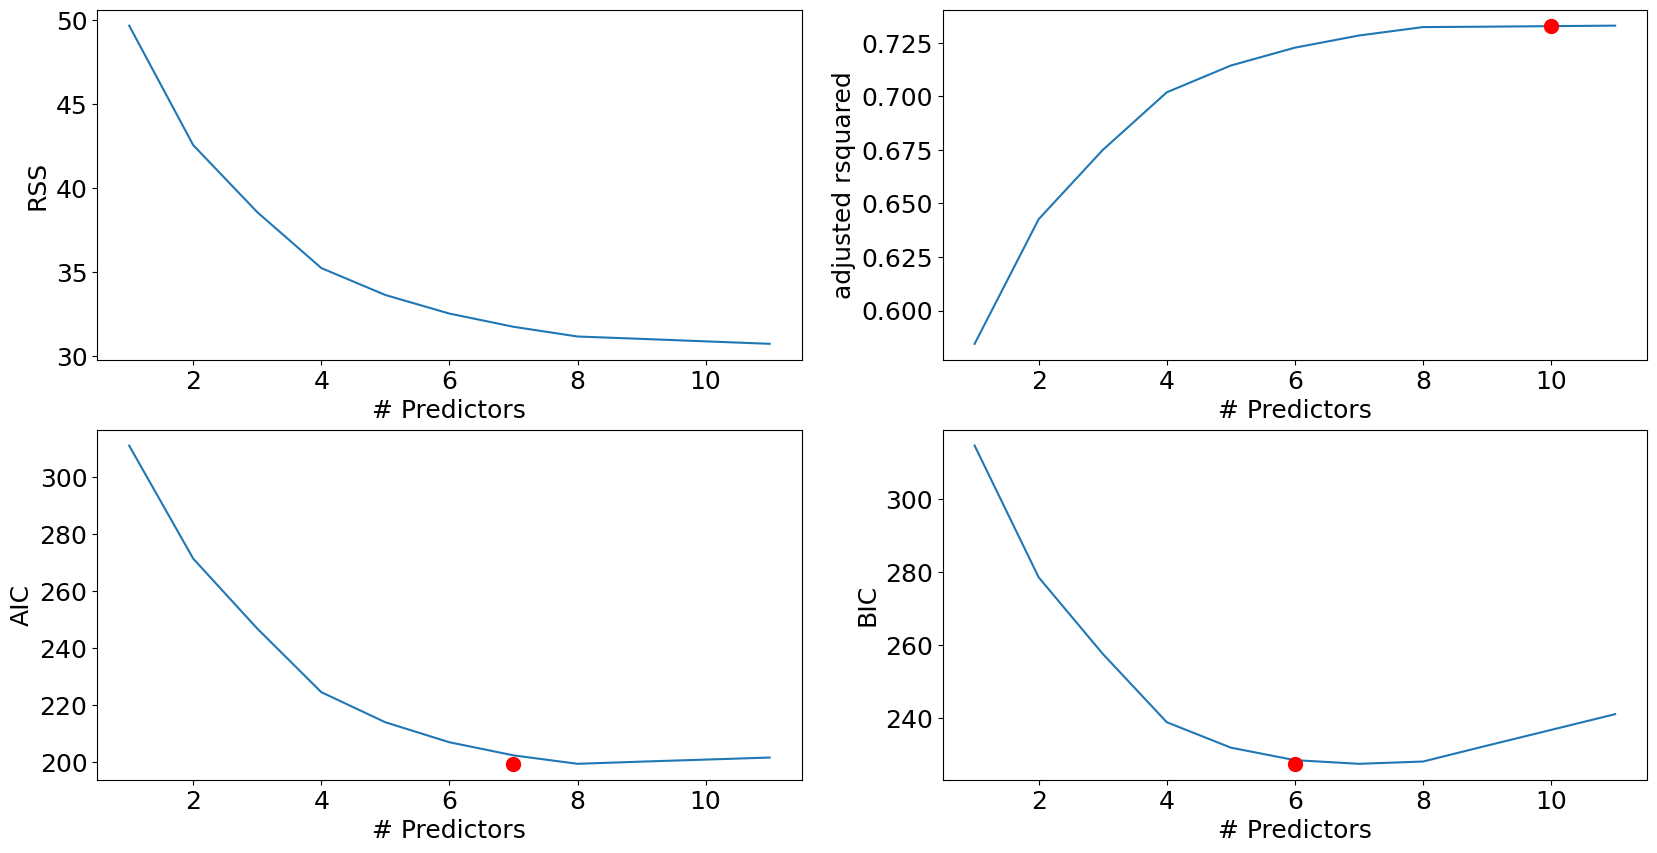

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

plt.subplot(2, 2, 1)

plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

Forward Stepwise Selection

- Begins with a empty model and adds variables until a stopping criterion is employed

In [ ]:
def forward(predictors):

    remaining_predictors = [p for p in X.columns if p not in predictors]

    tic = time.time()

    results = []

    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))

    models = pd.DataFrame(results)

    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")

    return best_model

In [ ]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  13 models on 1 predictors in 0.3146226406097412 seconds.
Processed  12 models on 2 predictors in 0.17188596725463867 seconds.
Processed  11 models on 3 predictors in 0.11257362365722656 seconds.
Processed  10 models on 4 predictors in 0.03198575973510742 seconds.
Processed  9 models on 5 predictors in 0.029329776763916016 seconds.
Processed  8 models on 6 predictors in 0.026107311248779297 seconds.
Processed  7 models on 7 predictors in 0.027408361434936523 seconds.
Processed  6 models on 8 predictors in 0.029331207275390625 seconds.
Processed  5 models on 9 predictors in 0.018093585968017578 seconds.
Processed  4 models on 10 predictors in 0.016021251678466797 seconds.
Processed  3 models on 11 predictors in 0.011300802230834961 seconds.
Processed  2 models on 12 predictors in 0.007993936538696289 seconds.
Processed  1 models on 13 predictors in 0.004822492599487305 seconds.
Total elapsed time: 0.9132683277130127 seconds.


In [ ]:
print(models_fwd.loc[1, "model"].summary())
print(models_fwd.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                     HD   R-squared (uncentered):                   0.586
Model:                            OLS   Adj. R-squared (uncentered):              0.584
Method:                 Least Squares   F-statistic:                              380.8
Date:                Sat, 20 May 2023   Prob (F-statistic):                    1.93e-53
Time:                        01:01:18   Log-Likelihood:                         -154.58
No. Observations:                 270   AIC:                                      311.2
Df Residuals:                     269   BIC:                                      314.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Backwards Stepwise Selection

- Begins with a full model and removes variables until a stopping criterion is employed

In [ ]:
def backward(predictors):

    tic = time.time()

    results = []

    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))

    models = pd.DataFrame(results)

    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")

    return best_model

In [ ]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  13 models on 12 predictors in 0.04053235054016113 seconds.
Processed  12 models on 11 predictors in 0.02934718132019043 seconds.
Processed  11 models on 10 predictors in 0.032561540603637695 seconds.
Processed  10 models on 9 predictors in 0.02768111228942871 seconds.
Processed  9 models on 8 predictors in 0.025560855865478516 seconds.
Processed  8 models on 7 predictors in 0.021304607391357422 seconds.
Processed  7 models on 6 predictors in 0.017843246459960938 seconds.
Processed  6 models on 5 predictors in 0.015846729278564453 seconds.
Processed  5 models on 4 predictors in 0.028481245040893555 seconds.
Processed  4 models on 3 predictors in 0.014071464538574219 seconds.
Processed  3 models on 2 predictors in 0.008756160736083984 seconds.
Processed  2 models on 1 predictors in 0.00627446174621582 seconds.
Total elapsed time: 0.3055105209350586 seconds.


In [ ]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[6, "model"].params)

------------
Best Subset:
------------
Sex                        0.148803
Chest pain type            0.111453
Max HR                    -0.003243
ST depression              0.073729
Number of vessels fluro    0.129634
Thallium                   0.066225
dtype: float64


In [ ]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[6, "model"].params)

-----------------
Foward Selection:
-----------------
Thallium                   0.074602
Number of vessels fluro    0.131970
Exercise angina            0.147358
Max HR                    -0.002628
Chest pain type            0.088913
ST depression              0.065215
dtype: float64


In [ ]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[6, "model"].params)

-------------------
Backward Selection:
-------------------
Sex                        0.148803
Chest pain type            0.111453
Max HR                    -0.003243
ST depression              0.073729
Number of vessels fluro    0.129634
Thallium                   0.066225
dtype: float64
